In [49]:
! pip install networkx
! pip install plotly
! pip install colorlover

In [50]:
import networkx as nx
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import random
import colorlover as cl
from IPython.display import HTML
from collections import Counter
import matplotlib.pyplot as plt
import operator
import re
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.data import find
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##Q1 Choose a Hash-tag

In [0]:
df = pd.read_csv("tweets2009-06-0115.csv.zip", sep='\t', compression='zip')

In [52]:
print("Num of rows:", df.shape[0])

Num of rows: 3437690


In [53]:
df.head()

,date,user,tweet
0,2009-06-01 21:43:59,burtonator,No Post Title
1,2009-06-01 21:47:23,burtonator,No Post Title
2,2009-06-02 01:15:44,burtonator,No Post Title
3,2009-06-02 05:17:52,burtonator,No Post Title
4,2009-06-02 23:58:25,burtonator,No Post Title


####Most Common Hashtag

In [0]:
allTweets = df["tweet"].str.cat(sep=' ')
tweetWords = [word.strip(""" ,.:'\";""").lower() for word in allTweets.split()]
hashTags = [word for word in tweetWords if word.startswith("#")]
hashTagsCounter = Counter(hashTags)

In [55]:
hashTagsCounter.most_common(100)

[('#iranelection', 26853),
 ('#followfriday', 16400),
 ('#jobs', 13322),
 ('#iremember', 11057),
 ('#spymaster', 10587),
 ('#ff', 10446),
 ('#squarespace', 9198),
 ('#tcot', 7691),
 ('#fb', 6107),
 ('#cnnfail', 4451),
 ('#11thcommandment', 3429),
 ('#jtv', 3317),
 ('#140mafia', 3144),
 ('#iran', 2935),
 ('#', 2895),
 ('#news', 2837),
 ('#quote', 2750),
 ('#vampirebite', 2634),
 ('#1', 2587),
 ('#bsb', 2433),
 ('#tweetmyjobs', 2086),
 ('#iphone', 1697),
 ('#lastfm', 1599),
 ('#mp2', 1589),
 ('#niley', 1528),
 ('#music', 1489),
 ('#p2', 1439),
 ('#follow', 1390),
 ('#pawpawty', 1305),
 ('#hhrs', 1256),
 ('#fail', 1246),
 ('#twitter', 1216),
 ('#tlot', 1214),
 ('#facebook', 1177),
 ('#sgp', 1151),
 ('#mashchat', 1143),
 ('#tinychat', 1111),
 ('#2', 1107),
 ('#digg', 1102),
 ('#gop', 1009),
 ('#phish', 1001),
 ('#mlb', 962),
 ('#travel', 932),
 ('#bonnaroo', 887),
 ('#twitpocalypse', 879),
 ('#iranelections', 857),
 ('#rt', 856),
 ('#zensursula', 811),
 ('#jamlegend', 790),
 ('#quotes', 75

In [0]:
iphoneTag = df[df["tweet"].str.lower().str.contains("#iphone", na=False)].copy()

In [0]:
def addMentionedColumn(df):
    
    def mentionsList(txt):
        allWords = [word.strip(""" ,.:'\";""").lower() for word in txt.split()]
        allNames = [word.strip("@") for word in allWords if word.startswith("@")]
        uniqueNames = list(set(allNames))
        return allNames
    
    df["mentioned"] = df["tweet"].apply(mentionsList)

In [0]:
addMentionedColumn(iphoneTag)

In [59]:
iphoneTag.head(10)

,date,user,tweet,mentioned
723,2009-06-11 16:57:53,testfiets,#iPhone: iPhone 3G S: de jacht op simlockvrije...,[]
3196,2009-06-11 17:02:56,skydivertak,Wow! Three people have won an #iPhone from the...,[]
3910,2009-06-11 17:05:17,iphoneblogs,#iphone info: Trains for iPhone: For lovers of...,[]
4397,2009-06-11 17:06:21,hirtme,Just added Thursday's app review for #iPhone a...,[]
6158,2009-06-11 17:08:31,h0n3y,#squarespace is giving away #iphones for free?...,[]
6946,2009-06-11 17:09:13,apple_buzz,#iphone #apple Review: KarmaStar for iPhone (s...,[]
7374,2009-06-11 17:10:02,habdelra,#joyoftech #iphone 3g #ass. Pretty funny! http...,[]
8398,2009-06-11 17:11:00,eekayonline,Apple's WWDC09 Keynote in 3 minutes.. http://b...,[]
8846,2009-06-11 17:11:21,m1h1m1,#apple #iphone Where and when you can get the ...,[]
8864,2009-06-11 17:11:21,rajatjain,RT @iPhone_alerts: Store hours to change for i...,[iphone_alerts]


##Q2 Mention Graph

In [0]:
def mentionGraph(df):
    g = nx.Graph()
    
    for (index, date, user, tweet, mentionedUsers) in df.itertuples():
        for mentionedUser in mentionedUsers:
            if (user in g) and (mentionedUser in g[user]):
                g[user][mentionedUser]["numberMentions"] += 1
            else:
                g.add_edge(user, mentionedUser, numberMentions=1)
    
    return g

In [0]:
iphoneGraph = mentionGraph(iphoneTag)

In [0]:
import random
def addRandomPositions(graph):
    posDict = dict((node,(random.gauss(0,10),random.gauss(0,10))) for node in graph.nodes())
    nx.set_node_attributes(graph, name="pos", values=posDict)

In [0]:
addRandomPositions(iphoneGraph)

###(a)

In [64]:
print("# nodes:", len(iphoneGraph.nodes()))
print("# edges:", len(iphoneGraph.edges()))

# nodes: 948
# edges: 714


###(b)

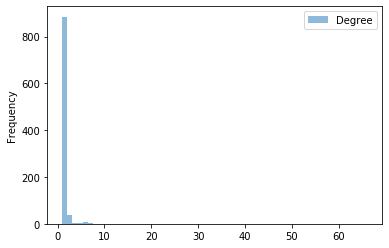

In [65]:
G=pd.DataFrame(list(nx.degree(iphoneGraph)),columns = ['Node' , 'Degree'])
G.plot.hist(bins=60,alpha=0.5)

The node degree is the number of edges adjacent to the node. Most nodes have degree of 1.

###(c) top 5 edges with highest weights

In [0]:
def weight_dict(G):
    weight_dict = {}
    for (u,v) in G.edges():
        edgeWidth = G[u][v]['numberMentions']
        weight_dict[(u,v)] = edgeWidth
    return weight_dict

iphone_edge_dict = weight_dict(iphoneGraph)

In [0]:
top_5_edge = sorted(iphone_edge_dict.items(), key=lambda x: -x[1])[:5]

In [68]:
top_5_edge

[(('shabzcohelp', 'touchmiphone'), 6),
 (('sophiewilkinson', 'bacardikid'), 6),
 (('allthingsiphone', 'iphonealley'), 5),
 (('uniqueapps', 'banolka'), 4),
 (('uniqueapps', 'musiktrixinc'), 4)]

###(c) visualization of the mention graph

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [0]:
def plotNetworkSize(graph):
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                hoverinfo='none',
                mode='markers', 
                marker=dict(
                    color="#888", 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [71]:
configure_plotly_browser_state()
plotNetworkSize(iphoneGraph)

##Q3 Content Analysis

###(a) Frequent Words

In [0]:
def getTopK(df, k, value_column='tweet', min_length = 2):
    stop = set(stopwords.words('english'))
    counter = Counter()
    for twt in df[value_column]:
        counter.update([word.lower() 
                        for word 
                        in tokenize.regexp.regexp_tokenize(twt, pattern='\w+') 
                        if word.lower() not in stop and word.isalpha() and len(word)>=min_length])
    topk = counter.most_common(k)
    return topk

In [73]:
getTopK(iphoneTag, 100)

[('iphone', 2515),
 ('http', 1734),
 ('com', 734),
 ('ly', 619),
 ('bit', 586),
 ('rt', 528),
 ('app', 483),
 ('tinyurl', 263),
 ('apple', 257),
 ('cool', 246),
 ('check', 205),
 ('yappler', 194),
 ('win', 180),
 ('entered', 155),
 ('quickpwn', 136),
 ('new', 111),
 ('free', 110),
 ('twitter', 93),
 ('im', 90),
 ('go', 89),
 ('squarespace', 88),
 ('news', 85),
 ('gd', 84),
 ('enter', 77),
 ('apps', 76),
 ('via', 73),
 ('pre', 71),
 ('tr', 70),
 ('mac', 68),
 ('wwdc', 64),
 ('pr', 62),
 ('giveaway', 58),
 ('retweet', 58),
 ('live', 58),
 ('travel', 58),
 ('su', 57),
 ('www', 56),
 ('yet', 54),
 ('uniqueapps', 53),
 ('sports', 53),
 ('cli', 52),
 ('gs', 52),
 ('follow', 50),
 ('de', 49),
 ('get', 49),
 ('ipod', 49),
 ('travelto', 48),
 ('os', 47),
 ('video', 47),
 ('twitpic', 46),
 ('track', 46),
 ('iphoneclub', 45),
 ('added', 44),
 ('activity', 43),
 ('realtime', 43),
 ('mobile', 42),
 ('telemetry', 42),
 ('store', 38),
 ('android', 38),
 ('web', 38),
 ('everythingicafe', 38),
 ('wefol

###(b)

In [0]:
def getTopK_user(df, k, label_value, label_column='user', operation=operator.eq, value_column='tweet',min_length=2):
    # return top k words for tweet of each user
    stop = set(stopwords.words('english'))
    counter = Counter()
    for twt in df.loc[operation(df[label_column],label_value)][value_column]:
            counter.update([word.lower() 
                            for word 
                            in tokenize.regexp.regexp_tokenize(twt, pattern='\w+') 
                            if word.lower() not in stop and len(word)>=min_length and word.isalpha()])
    topk = counter.most_common(k)
    return topk

In [0]:
def plotNetworkSize_hover(graph):
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='text',
                text="Edge: %s\Weight: %f" % ((node1,node2), edgeWidth),
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color='#888'))
        scatters.append(s)


    for node in graph.nodes():
        xPos, yPos = graph.nodes[node]['pos']
        top3 = getTopK_user(iphoneTag, k=3, label_value=node)
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                hoverinfo='text',
                text='Node: %s,Top words: %s' % (node,top3),
                mode='markers', 
                marker=dict(
                    color="#888", 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [76]:
configure_plotly_browser_state()
plotNetworkSize_hover(iphoneGraph)

##Q4 Centrality Analysis


###(a)

In [0]:
pageRank = nx.pagerank(iphoneGraph)

In [0]:
Betw=nx.betweenness_centrality(iphoneGraph)

###(b)

In [0]:
import colorlover as cl
from IPython.display import HTML

In [80]:
# map purd color scale to 300 cells
purd = cl.scales['9']['seq']['PuRd']
purd300 = cl.interp(purd, 300)
HTML(cl.to_html(purd300))

In [0]:
def plotNetworkSizeColor(graph,centrality):
    
    maxCentr = max(centrality.values())
    minCentr = min(centrality.values())
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        nodeCentr = centrality[node]
        nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s\nCloseness: %.3f" % (node, nodeCentr),
                hoverinfo='text',
                mode='markers', 
                marker=dict(
                    color=purd300[nodeColor], 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [82]:
configure_plotly_browser_state()
plotNetworkSizeColor(iphoneGraph,pageRank)

In [83]:
configure_plotly_browser_state()
plotNetworkSizeColor(iphoneGraph,Betw)

###(c)

The result for the nodes with top centrality rankedly the same, however, the rest of the results are different. 
Betweenness centrality measures how important a node is to the shortest paths through the network. 
PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. 
In the content of this assignment, pageRank makes more sense because it calculate how many users linked to this hastag. 

##Q5 Connectivity Patterns

###(a)

####Number of maximal cliques of graph

In [0]:
maxCliques = nx.graph_number_of_cliques(iphoneGraph)

In [85]:
maxCliques

670

####The graph's clique number (size of the largest clique in the graph)

In [86]:
clique = nx.graph_clique_number(iphoneGraph)
clique

4

####Number of maximal cliques for each node

In [0]:
numcliques = nx.number_of_cliques(iphoneGraph)

In [88]:
numcliques

{'': 8,
 '0lli': 4,
 '0lli)': 1,
 '103interactive': 1,
 '1732': 2,
 '1txsage1957': 1,
 '2cre8': 3,
 '360kid': 1,
 '3djay': 1,
 '3guser': 1,
 '3rdwhale': 1,
 '4dogz': 2,
 '9to5mac': 1,
 '_dominic': 1,
 '_stoicone_': 1,
 'a0k': 1,
 'aaronliwf': 1,
 'abedross': 1,
 'abefromen': 1,
 'abqcitylife': 1,
 'abusedgrymatter': 1,
 'acenima': 1,
 'acidcrc': 1,
 'addtimes3': 1,
 'admore': 2,
 'adnrw)': 1,
 'adriandtellez': 1,
 'adrianeden': 1,
 'agenturblog': 1,
 'aghausman': 1,
 'agiledeveloper': 1,
 'ahhyeah': 1,
 'aimes83': 1,
 'ajgoodyo': 1,
 'akcoder': 1,
 'alanatpresent': 1,
 'alba': 1,
 'albdarn': 1,
 'albertpak': 1,
 'alexlec': 1,
 'allaboutiphone': 1,
 'allaboutiphone)': 1,
 'alldressforms': 1,
 'alleyinsider': 2,
 'allthingsiphone': 2,
 'aloo020': 1,
 'alphaacid': 2,
 'amaury': 3,
 'ambkwan': 1,
 'aminnovative': 1,
 'amlcares': 1,
 'amyherndon': 1,
 'anantkataria': 1,
 'andrewbusey': 2,
 'androidpartybe': 1,
 'andylaird25': 1,
 'andymoulster': 2,
 'angeleyezl': 1,
 'angle_of_death': 1,
 '

###(b)

The graph has 948 nodes and 714 edges. 

Most of the nodes have maximum clinques of 1, which mean the nodes only connected to 1 user. There are only 3 nodes have more than 10 clinques. The maximum clinques a node has is 40, which is uniqueapps. This hastag may connected to more topics than ohter hashtags. 